# Research assignment 4


Hunter Prout

Research assignment 4

3/9/24

In [1]:
set maxvar 120000
use race educ age wrkstat respect sex prestg10 year id using GSS2022.dta
eststo clear 

In [41]:
tab respect if respect == 1


    r treated with respect at |
                         work |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
               strongly agree |        766      100.00      100.00
------------------------------+-----------------------------------
                        Total |        766      100.00


In [2]:
tab educ


       highest year of school |
                    completed |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
          no formal schooling |          3        0.09        0.09
                            1 |          1        0.03        0.11
                            2 |          4        0.11        0.23
                            3 |          8        0.23        0.45
                            4 |          6        0.17        0.62
                            5 |          6        0.17        0.79
                            6 |         23        0.65        1.45
                            7 |         12        0.34        1.79
                            8 |         37        1.05        2.84
                            9 |         57        1.62        4.46
                           10 |         78        2.21        6.67
                           11 |        116        3.29        9.96
                           12

In [3]:
tab race


           race of respondent |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
                        white |      2,514       72.01       72.01
                        black |        565       16.18       88.20
                        other |        412       11.80      100.00
------------------------------+-----------------------------------
                        Total |      3,491      100.00


In [4]:
gen black = race 
replace black = 0 if race == 1
replace black = 0 if race == 3 
replace black = 1 if race == 2
tab black

(53 missing values generated)
(2,514 real changes made)
(412 real changes made)
(565 real changes made)

      black |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,926       83.82       83.82
          1 |        565       16.18      100.00
------------+-----------------------------------
      Total |      3,491      100.00


In [5]:
gen white = race 
replace white = 1 if race == 1
replace white = 0 if race == 3 
replace white = 0 if race == 2
tab white

(53 missing values generated)
(0 real changes made)
(412 real changes made)
(565 real changes made)

      white |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        977       27.99       27.99
          1 |      2,514       72.01      100.00
------------+-----------------------------------
      Total |      3,491      100.00


In [6]:
gen otherrac = race 
replace otherrac = 1 if race == 3 
replace otherrac = 0 if race == 1
replace otherrac = 0 if race == 2
tab otherrac

(53 missing values generated)
(412 real changes made)
(2,514 real changes made)
(565 real changes made)

   otherrac |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      3,079       88.20       88.20
          1 |        412       11.80      100.00
------------+-----------------------------------
      Total |      3,491      100.00


In [7]:
tab sex


              respondents sex |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
                         male |      1,627       46.17       46.17
                       female |      1,897       53.83      100.00
------------------------------+-----------------------------------
                        Total |      3,524      100.00


In [8]:
ds

year      wrkstat   age       sex       respect   white
id        prestg10  educ      race      black     otherrac


## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    
H.1   I hypothesize that the "respect" variable – which indicates how strongly a respondent agrees that they are treated with respect at work – will be lesser if a respondent is not white 
 
H.2 I hypothesize that the "respect" variable – which indicates how strongly a respondent agrees that they are treated with respect at work – will be lesser if a respondent is not white and if the respondent has less than a college education than if a respondant is white and has 16 years or more of education. 


These hypotheses are testing the impact of race(nomIV) and education (intvIV) on feeling respected at work(catDV). This test lies on the theory that people who are of higher social status tend to be treated with more respect at work. https://doi.org/10.2307/2786295 https://www.jstor.org/stable/2786295

Education is a growing indicator of social status, as your years of education grow, your social status grows. Also, people with higher years of education are expected to work in more prestigious jobs that probably are more respected by society (doctor, lawyer...); people with less education work in jobs that are less respectable to society(janitor, fast food). This relationship should support our hypothesis and may effect out outcomes. The people with more completed years of education can be expected to feel more respected in their work. 

Historically, white people have placed themselves at a higher level of social ranking or status than Black or other races – through slavery, colonization, genocide, domination etc. – this means that white people should feel the most respected at work according to our theory. This history also causes white people to work in respected jobs more frequently than Black or other people will work in these positions. The racial inequality in job type may affect my analysis, I will include occupational prestige to see if it interacts or causes some sort of change in the relatinship. There is a socioeconmic theory of "the racial wage" which may play a role in the interaction that I am investigating. The racial wage is a theory from W.E.B DuBois which shows that non-white workers experince income gaps even when other factors like qualifications are held equal. The racial wage may cause non-white workers to feel less respected at work because they are paid less in the same exact job as their white coworkers.

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [9]:
eststo: reg respect educ prestg10 sex black white otherrac

note: otherrac omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =     1,881
-------------+----------------------------------   F(5, 1875)      =      7.10
       Model |  16.4262091         5  3.28524182   Prob > F        =    0.0000
    Residual |  867.600373     1,875  .462720199   R-squared       =    0.0186
-------------+----------------------------------   Adj R-squared   =    0.0160
       Total |  884.026582     1,880  .470226905   Root MSE        =    .68024

------------------------------------------------------------------------------
     respect | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |  -.0109079   .0063451    -1.72   0.086    -.0233521    .0015363
    prestg10 |  -.0049631   .0013056    -3.80   0.000    -.0075238   -.0024025
         sex |   .0500903   .0315956     1.59   0.113     -.011876    .1120565
  

In [10]:
pwcorr respect educ wrkstat otherrac black white


             |  respect     educ  wrkstat otherrac    black    white
-------------+------------------------------------------------------
     respect |   1.0000 
        educ |  -0.0896   1.0000 
     wrkstat |  -0.0022  -0.1663   1.0000 
    otherrac |   0.0430  -0.0723  -0.0010   1.0000 
       black |  -0.0234  -0.0589  -0.0051  -0.1607   1.0000 
       white |  -0.0128   0.1002   0.0049  -0.5868  -0.7049   1.0000 


Based on my regression I can see that race has a negative coefficient for both white and black people. This Coefficient is larger for Black people than white people. This means that being black is related to a more significant mean decrease in feeling respected at work than being white is while holding other variables constant. This is indicated in the data as Black has a -.13 coefficient and white has a coefficient of  -.05. The R squared coefficient is low for the overall relationship meaning that there are probably more varibales that are explaining respect at work that I am not using. 

In [11]:
eststo: reg respect i.race##c.educ c.prestg10##i.race##c.educ

note: educ omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =     1,883
-------------+----------------------------------   F(11, 1871)     =      3.17
       Model |   16.180356        11  1.47094146   Prob > F        =    0.0003
    Residual |  868.886027     1,871  .464396594   R-squared       =    0.0183
-------------+----------------------------------   Adj R-squared   =    0.0125
       Total |  885.066383     1,882  .470279694   Root MSE        =    .68147

------------------------------------------------------------------------------
     respect | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        race |
      black  |   .2224002   .8891237     0.25   0.803    -1.521378    1.966179
      other  |  -.0077894   .7099363    -0.01   0.991     -1.40014    1.384561
             |
        educ |   .0007891   .0247675     0.03   0.975  

When I include interaction terms, you can see that being black is signficiant to the feeling respected at work indicated by a coefficent of .22. Years of education completed (educ) and occupational prestige (prestg10) both have a very small coefficent to the dependent variable. Upon interacting occupational prestiege, race, and education there is not as much statistical significance to feeling respected at work compared to the black varaible alone. the P values are between 0 and 1; this means that there is signficance in this relationship. 

In [12]:
esttab, stats(r2 N, labels("Rsquared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
nobase mlabels("Model 1" "Model 2") starlevels(* .1 ** .05 *** .01)  ///
coeflabels (2.race "Black" 3.race "Other" educ "Years of education" ///
2.race#c.educ "Black * education" 3.race#c.educ "Other * education") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Years of e~n       -0.011*          0.001   
                  (0.006)         (0.025)   
prestg10           -0.005***        0.000   
                  (0.001)         (0.008)   
sex                 0.050                   
                  (0.032)                   
black              -0.138**                 
                  (0.060)                   
white              -0.059                   
                  (0.048)                   
otherrac            0.000                   
                      (.)                   
Black                               0.222   
                                  (0.889)   
Other                              -0.008   
                                  (0.710)   
Black * ed~n                       -0.018   
         

This estab shows that Black, occupational preseiege, and years of education completed are all significant as individual variables. However, the interactions are not rated with the same significance.

In [ ]:
%set graph_width = 11

In [ ]:
%set graph_height = 8


Variables that uniquely identify margins: race educ


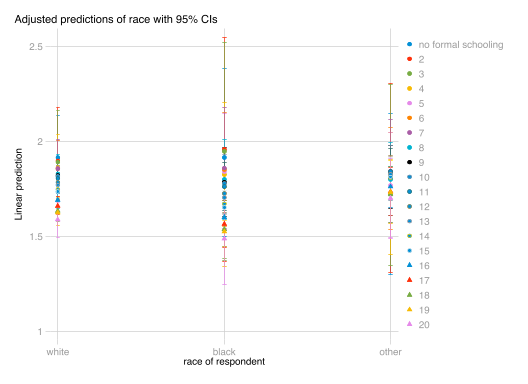

In [25]:
quietly reg respect c.educ##i.race c.prestg10##i.race##c.educ
quietly margins i.race, over(educ) atmeans
marginsplot, recast(scatter) scheme(538w)

In [27]:
sum educ


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        educ |      3,524    14.10812    2.893797          0         20



Variables that uniquely identify margins: educ race


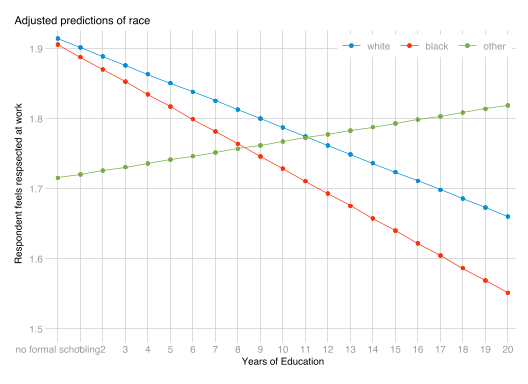

In [34]:
quietly reg respect c.educ##i.race c.prestg10##i.race##c.educ

quietly margins race, at(educ=(0(1)20)) atmeans 
marginsplot, noci legend(on) xtitle("Years of Education") ///
ytitle("Respondent feels respsected at work") legend(rows(1) position(1) ring(0)) scheme (538w)


Variables that uniquely identify margins: prestg10 race


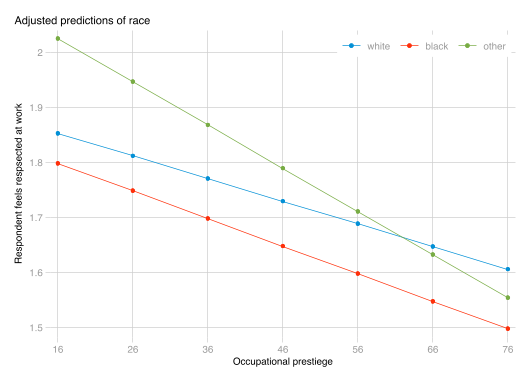

In [33]:
quietly reg respect c.educ##i.race c.prestg10##i.race##c.educ

quietly margins race, at(prestg10=(16(10)80)) atmeans 
marginsplot, noci legend(on) xtitle("Occupational prestiege") ///
ytitle("Respondent feels respsected at work") legend(rows(1) position(1) ring(0)) scheme (538w)

In [31]:
sum prestg10


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
    prestg10 |      3,326    44.92483    13.57154         16         80


## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
My H1 is accepted: a respondents "respect" variable will be lower if the respondent is not white. This is denied because the "other" racial group has a higher perception of respect at work with a negative correlation for years of education where as their education grows, thier feeling of respect lowers. White and Black racial groups both gain respect at work as their education grows with White people at the lowest starting perception level of respect of the 3 groups.  

H.2 : H2 is also rejected just barely! THe "other" racial groups is really causing some unexpected outcomes in my analysis, even at 12 years of completed education, the other group has a continually lower sense of feeling respected in theor work. This contradicts the theory that socioeconomic status is important to being respected in your work position. Also surprisng, Black people with less than 16 years of education feel more respected at work than white poeple or other races with the same education. This contradicts my theory and hypothesis. 

    B. Why do the regression coefficients support or contradict your hypotheses?
    
THe regression coefficent of the individual variable for Black signifies that it supports my hypothesis. Being black explains about %22 of your feeling of respect in the workplace. I think that this is represented while the interaction coefficents are and the "other" racial group is not strong because Black people are the least regaurded as highstatus individuals based on race, Black people make up the lowest population in education, and Black people are among the poorest racial groups in the united states. These aspects align with the theory that my hypothesis is based on. This theory would suggest that Black people are the racial group that is most impacted by socioeconmic status difference and respect in the job place. 


    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    
   The regression estimates from margins show that my hypotheses are rejected. After reviewing the regression coefficents with the graph, I realize that age may have been an important factor to include. I think that age has a significant impact on feeling of respect in work and would also correlat to people having more education. Ultiamtely, my graphs show the exact opposite of my hypotheses. As education increases, respect in the workplace is gained more significantly by Blacks than whites. Other race people actually lose respect in the workplace as their years education completed increases. 
   
I never did add age into my assignment, but I added prestg10 - occupational prestiege out of curriousity about half way though. The feedback from running regression on occupational prestiege seem to be a little more realistic than the education variable as a measure of social status. Occupational prestige margin estimates show more realistically what I was expecting to find in this assignment. As occupational presteige grows, people's feeling of being respected at work grows across the board. White people benifit the least from increasing their occupational prestiege and other race people start at the lowest level of respect with a baseline prestige job. Black people start at the highest levels of feeling of respect for low prestiege jobs and benefit the most in feeling respected for increasing the presiege of their occupation. 